In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score


In [58]:
df=pd.read_csv('/content/drive/MyDrive/DATA_SCIENCE/CSV_XLSX_files/FuelConsumption (1).csv')

In [59]:
backup=df.copy()
df1=df.copy()
df1.head()

,Year,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,2000,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216
1,2000,ACURA,1.6EL,COMPACT,1.6,4,M5,X,9.8,205
2,2000,ACURA,3.2TL,MID-SIZE,3.2,6,AS5,Z,13.7,265
3,2000,ACURA,3.5RL,MID-SIZE,3.5,6,A4,Z,15.0,301
4,2000,ACURA,INTEGRA,SUBCOMPACT,1.8,4,A4,X,11.4,230


In [60]:
 df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 639 entries, 0 to 638
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Year              639 non-null    int64  
 1   MAKE              639 non-null    object 
 2   MODEL             639 non-null    object 
 3   VEHICLE CLASS     639 non-null    object 
 4   ENGINE SIZE       639 non-null    float64
 5   CYLINDERS         639 non-null    int64  
 6   TRANSMISSION      639 non-null    object 
 7   FUEL              639 non-null    object 
 8   FUEL CONSUMPTION  639 non-null    float64
 9   COEMISSIONS       639 non-null    int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 50.1+ KB


In [61]:
df1.isnull().sum()

,0
Year,0
MAKE,0
MODEL,0
VEHICLE CLASS,0
ENGINE SIZE,0
CYLINDERS,0
TRANSMISSION,0
FUEL,0
FUEL CONSUMPTION,0
COEMISSIONS,0


In [62]:
df1.Year.value_counts()

,count
Year,
2000,639


In [63]:
df1.drop('Year',axis=1,inplace=True)

In [64]:
df1.head(1)

,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,ACURA,1.6EL,COMPACT,1.6,4,A4,X,10.5,216


In [65]:
df1.MAKE.value_counts()

,count
MAKE,
CHEVROLET,63
FORD,62
DODGE,46
TOYOTA,43
GMC,38
VOLKSWAGEN,36
BMW,29
AUDI,22
MERCEDES-BENZ,22


In [66]:
df1.MODEL.value_counts()

,count
MODEL,
JETTA,6
LS,6
C1500 SILVERADO,5
K1500 SILVERADO 4X4,5
RAM 1500,5
...,...
3.5RL,1
V70 AWD TURBO,1
V70 GLT TURBO,1


In [67]:
df1['VEHICLE CLASS'].value_counts()

,count
VEHICLE CLASS,
COMPACT,105
SUBCOMPACT,104
SUV,97
PICKUP TRUCK - STANDARD,92
MID-SIZE,77
FULL-SIZE,28
MINIVAN,26
STATION WAGON - MID-SIZE,25
VAN - CARGO,23


In [68]:
df1['TRANSMISSION'].value_counts()

,count
TRANSMISSION,
A4,324
M5,191
A5,73
M6,23
AS4,12
A3,10
AS5,5
AS6,1


In [69]:
df1['FUEL'].value_counts()

,count
FUEL,
X,454
Z,176
D,6
E,2
N,1


In [70]:
df1['ENGINE SIZE'].value_counts()

,count
ENGINE SIZE,
2.0,56
4.3,45
1.8,37
3.0,37
4.0,33
2.5,31
2.4,31
2.8,29
2.2,26


In [71]:
df1['FUEL CONSUMPTION'].value_counts()

,count
FUEL CONSUMPTION,
15.4,16
15.5,16
13.9,15
13.6,14
13.2,14
...,...
9.9,1
8.6,1
8.7,1


In [72]:
df1['CYLINDERS'].value_counts()

,count
CYLINDERS,
6,263
4,209
8,136
5,19
12,7
3,3
10,2


In [73]:
df1.describe()

,ENGINE SIZE,CYLINDERS,FUEL CONSUMPTION,COEMISSIONS
count,639.000000,639.000000,639.000000,639.000000
mean,3.265728,5.805947,14.713615,296.809077
std,1.231012,1.625588,3.307044,65.504178
min,1.000000,3.000000,4.900000,104.000000
25%,2.200000,4.000000,12.500000,253.000000
50%,3.000000,6.000000,14.400000,288.000000
75%,4.300000,6.000000,16.600000,343.000000
max,8.000000,12.000000,30.200000,582.000000


In [74]:
LabelEncoder=LabelEncoder()


In [75]:
df1['FUEL']=LabelEncoder.fit_transform(df1['FUEL'])
print(df1[['FUEL']])

     FUEL
0       3
1       3
2       4
3       4
4       3
..    ...
634     4
635     4
636     4
637     4
638     4

[639 rows x 1 columns]


In [76]:
df1['VEHICLE CLASS']=LabelEncoder.fit_transform(df1['VEHICLE CLASS'])
print(df1['VEHICLE CLASS'])

0      0
1      0
2      2
3      2
4      9
      ..
634    7
635    7
636    7
637    7
638    7
Name: VEHICLE CLASS, Length: 639, dtype: int64


In [77]:
df1['MAKE']=LabelEncoder.fit_transform(df1['MAKE'])
print(df1['MAKE'])

0       0
1       0
2       0
3       0
4       0
       ..
634    35
635    35
636    35
637    35
638    35
Name: MAKE, Length: 639, dtype: int64


In [78]:
df1['ENGINE SIZE']=LabelEncoder.fit_transform(df1['ENGINE SIZE'])
print(df1['ENGINE SIZE'])

0       3
1       3
2      16
3      19
4       4
       ..
634     9
635     9
636     8
637     8
638     9
Name: ENGINE SIZE, Length: 639, dtype: int64


In [79]:
df1.head(1)

,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,0,1.6EL,0,3,4,A4,3,10.5,216


In [80]:
df1['MODEL']=LabelEncoder.fit_transform(df1['MODEL'])
print(df1['MODEL'])

0        0
1        0
2        1
3        2
4      164
      ... 
634    303
635    304
636    305
637    305
638    306
Name: MODEL, Length: 639, dtype: int64


In [81]:
df1['TRANSMISSION']=LabelEncoder.fit_transform(df1['TRANSMISSION'])
print(df1['TRANSMISSION'])

0      1
1      6
2      4
3      1
4      1
      ..
634    1
635    1
636    1
637    6
638    2
Name: TRANSMISSION, Length: 639, dtype: int64


In [82]:
corr=df1.corr()
print('correlation matrix')
print(corr)

correlation matrix
                      MAKE     MODEL  VEHICLE CLASS  ENGINE SIZE  CYLINDERS  \
MAKE              1.000000  0.164501      -0.066148    -0.393571  -0.368075   
MODEL             0.164501  1.000000       0.202299    -0.079532  -0.113059   
VEHICLE CLASS    -0.066148  0.202299       1.000000     0.293173   0.159792   
ENGINE SIZE      -0.393571 -0.079532       0.293173     1.000000   0.895160   
CYLINDERS        -0.368075 -0.113059       0.159792     0.895160   1.000000   
TRANSMISSION      0.058830 -0.021378      -0.026101    -0.238906  -0.205878   
FUEL             -0.077496 -0.091249      -0.115376     0.056883   0.230593   
FUEL CONSUMPTION -0.363855 -0.073373       0.334821     0.859209   0.825784   
COEMISSIONS      -0.336871 -0.049467       0.382798     0.853783   0.798447   

                  TRANSMISSION      FUEL  FUEL CONSUMPTION  COEMISSIONS   
MAKE                  0.058830 -0.077496         -0.363855     -0.336871  
MODEL                -0.021378 -0.091249

In [83]:
df1.head(1)

,MAKE,MODEL,VEHICLE CLASS,ENGINE SIZE,CYLINDERS,TRANSMISSION,FUEL,FUEL CONSUMPTION,COEMISSIONS
0,0,0,0,3,4,1,3,10.5,216


In [84]:
# x=Feattures column
x=df1[['MAKE','COEMISSIONS ','MODEL','VEHICLE CLASS','ENGINE SIZE','CYLINDERS','TRANSMISSION','FUEL']]

#Y =TARGET COLUMN
y=df1['FUEL CONSUMPTION']

In [85]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [86]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [87]:
y_pred=regression.predict(x_test)

In [88]:
y_pred

array([13.48661169, 17.77611583, 14.46679015, 24.78720241, 14.15410583,
       13.42260789, 14.82522377, 15.28141268, 20.44117841, 16.48676865,
       11.34736317, 11.69340273, 15.54575403, 11.18005842, 12.36186856,
       10.12930878, 13.32927092, 12.4682744 , 10.06157353, 11.44186117,
       14.10864737, 17.61463889, 15.83608957, 12.23824303, 16.25773855,
       21.18964315, 21.16864773, 11.38199855,  9.04768686, 14.666846  ,
       15.33024706, 13.85564853, 19.03087835, 17.12571382, 15.19860331,
       11.43901617, 13.56957138, 18.4238686 , 12.27038149, 11.77774607,
       14.70087579, 10.08917717, 28.77618509, 12.66968299, 19.32425739,
       12.62555932, 15.4446797 , 18.09092711, 15.01919404, 12.40696736,
       14.00099596, 12.20088467, 15.69102598, 14.27993168, 15.20452824,
       19.91928287, 18.44130986, 11.88242989, 25.6199982 , 19.51891937,
       18.84105114, 17.40494422, 17.52557578, 11.20889627, 15.88220796,
       16.13501617, 11.59436532, 14.0077124 , 15.21161991, 13.54

In [89]:
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

print(mae)
print(mse)
print(rmse)

0.3406056919913577
0.26214806592948436
0.5120039706188658


In [90]:
r2=r2_score(y_test,y_pred)
print(r2)

0.9808241635660454


In [91]:
cv_scores=cross_val_score(regression,x,y,scoring='r2',cv=5)

print('cv r2 scores:',cv_scores)
print('mean cv r2 scores:',cv_scores.mean())

cv r2 scores: [0.97436087 0.91989084 0.9858163  0.96508749 0.90823013]
mean cv r2 scores: 0.9506771233329658


In [92]:
y_pred=regression.predict(x_test)

mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
rmse=np.sqrt(mse)

In [93]:
r2=r2_score(y_test,y_pred)

In [94]:
print(mae)
print(mse)
print(rmse)
print(r2)

0.3406056919913577
0.26214806592948436
0.5120039706188658
0.9808241635660454


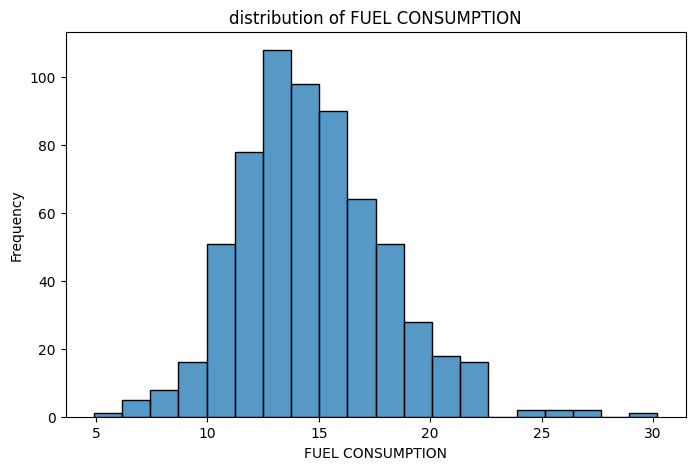

In [95]:
plt.figure(figsize=(8,5))
sns.histplot(df1['FUEL CONSUMPTION'],bins=20)
plt.title('distribution of FUEL CONSUMPTION')
plt.xlabel('FUEL CONSUMPTION')
plt.ylabel('Frequency')
plt.show()

In [97]:
counts,bin_edge=np.histogram(df1['FUEL CONSUMPTION'],bins=20)

for i in range(len(counts)):
  print(f'Fuel consumption between {bin_edge[i]} and {bin_edge[i+1]}: {counts[i]}')

Fuel consumption between 4.9 and 6.165: 1
Fuel consumption between 6.165 and 7.43: 5
Fuel consumption between 7.43 and 8.695: 8
Fuel consumption between 8.695 and 9.96: 16
Fuel consumption between 9.96 and 11.225: 51
Fuel consumption between 11.225 and 12.49: 78
Fuel consumption between 12.49 and 13.754999999999999: 108
Fuel consumption between 13.754999999999999 and 15.02: 98
Fuel consumption between 15.02 and 16.285: 90
Fuel consumption between 16.285 and 17.549999999999997: 64
Fuel consumption between 17.549999999999997 and 18.814999999999998: 51
Fuel consumption between 18.814999999999998 and 20.08: 28
Fuel consumption between 20.08 and 21.345: 18
Fuel consumption between 21.345 and 22.61: 16
Fuel consumption between 22.61 and 23.875: 0
Fuel consumption between 23.875 and 25.14: 2
Fuel consumption between 25.14 and 26.405: 2
Fuel consumption between 26.405 and 27.67: 2
Fuel consumption between 27.67 and 28.934999999999995: 0
Fuel consumption between 28.934999999999995 and 30.2: 1


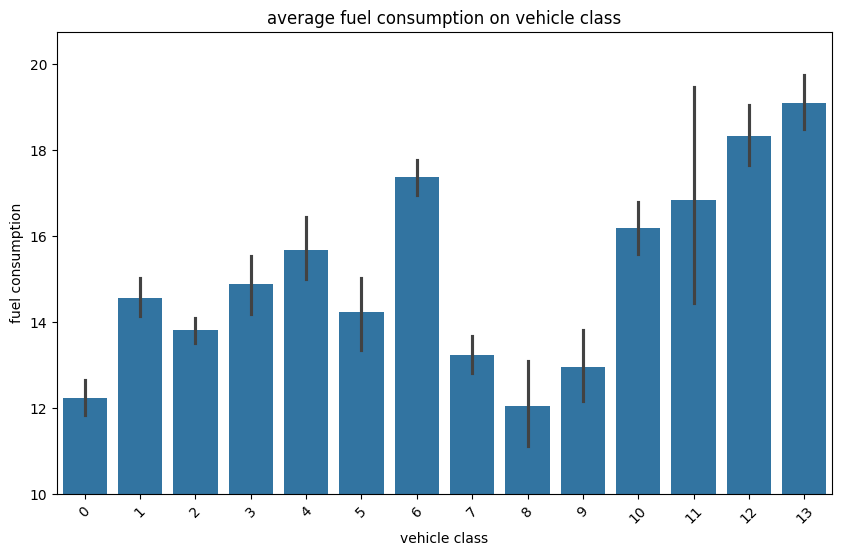

          VEHICLE CLASS NAME  AVG FUEL C
0            VAN - PASSENGER       19.09
1                VAN - CARGO       18.33
2    PICKUP TRUCK - STANDARD       17.37
3                 TWO-SEATER       16.85
4                        SUV       16.19
5                    MINIVAN       15.67
6                MINICOMPACT       14.89
7                  FULL-SIZE       14.55
8       PICKUP TRUCK - SMALL       14.23
9                   MID-SIZE       13.81
10  STATION WAGON - MID-SIZE       13.25
11                SUBCOMPACT       12.95
12                   COMPACT       12.24
13     STATION WAGON - SMALL       12.05
FUEL CONSUMPTION BY VEHICLE CLASS


In [98]:
plt.figure(figsize=(10,6))
sns.barplot(x='VEHICLE CLASS',y='FUEL CONSUMPTION',data=df1)
plt.title('average fuel consumption on vehicle class')
plt.xlabel('vehicle class')
plt.ylabel('fuel consumption')
plt.xticks(rotation=45)
plt.ylim(10,plt.gca().get_ylim()[1])
plt.show()

df1['VEHICLE CLASS NAME'] = backup['VEHICLE CLASS']
avg_fuel_c=df1.groupby('VEHICLE CLASS NAME')['FUEL CONSUMPTION'].mean().sort_values(ascending=False).reset_index()
avg_fuel_c=avg_fuel_c.rename(columns={'FUEL CONSUMPTION':'AVG FUEL C'}).round(2)
print(avg_fuel_c)
print('FUEL CONSUMPTION BY VEHICLE CLASS')

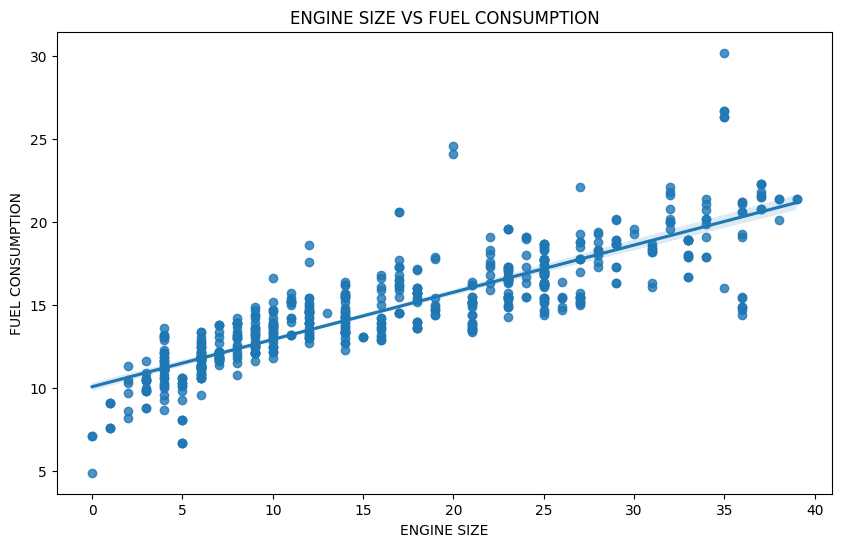

In [99]:
plt.figure(figsize=(10,6))
sns.regplot(x='ENGINE SIZE',y='FUEL CONSUMPTION',data=df1)
plt.title("ENGINE SIZE VS FUEL CONSUMPTION")
plt.xlabel('ENGINE SIZE')
plt.ylabel('FUEL CONSUMPTION')
plt.show()

In [100]:
#interactive plot

fig=px.scatter(df1,x='FUEL CONSUMPTION',y='COEMISSIONS ',color='ENGINE SIZE',hover_data=['MODEL','VEHICLE CLASS'])
title='FUEL CONSUMPTION VS COEMISSION'
fig.show()

In [108]:
avg_fuel_c=df1.groupby('MAKE_NAME')['FUEL CONSUMPTION'].mean()


df1['MAKE_NAME'] = backup['MAKE']

Highest_FUEL_CONSUMPTION_MAKE_NAME=avg_fuel_c.idxmax()
Highest_FUEL_CONSUMPTION=avg_fuel_c.max()

print(f'Make with Highest avg FUEL CONSUMPTION is {Highest_FUEL_CONSUMPTION_MAKE_NAME} with an average fuel consummption of {Highest_FUEL_CONSUMPTION} ltr/100km')

Make with Highest avg FUEL CONSUMPTION is FERRARI with an average fuel consummption of 26.414285714285715 ltr/100km
